In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Preparation

In [2]:
# Data loading
#Read myopia.csv into a Pandas DataFrame
file_path = Path("resources/myopia.csv")
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# Get the shape (number of columns and rows) of the DataFrame
df.shape

(618, 15)

In [4]:
#Remove the "MYOPIC" column from the dataset.
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)
labels = df['MYOPIC']
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

Sample Analysis

After examining the initial dataset, there are 15 features present in the data. After removing the "MYOPIC" column from the dataset, there are 14 features. 

## PCA

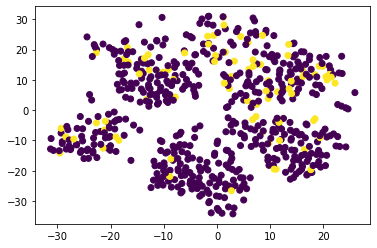

In [107]:
# Visualize the clusters with color
plt.scatter(X['x'], X['y'], c=labels)
plt.show()

In [6]:
#Perform dimensionality reduction with PCA.
# Initialize PCA model

pca = PCA(n_components=.9)

# Get two principal components for the data.
X_pca = pca.fit_transform(scaled_features)

In [7]:
# Get the shape of features after reduction
X_pca.shape

(618, 10)

In [8]:
df_pca = pd.DataFrame(
    data=X_pca, columns=[ "componant 1", "componant 2", "componant 3", "componant 4", 'componant 5', 'componant 6', 'componant 7', 'componant 8', 'componant 9', 'componant 10']
)
df_pca.head()

,componant 1,componant 2,componant 3,componant 4,componant 5,componant 6,componant 7,componant 8,componant 9,componant 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [9]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915187

Sample Analysis

After performing dimensionality reduction with PCA, there are 10 features in the data. According to the explained variance, we have 92% of the information in the original dataset which is over the desired 90% explained variance.

## T-SNES

In [21]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=250)

In [22]:
# Reduce dimensions
tsne_features = tsne.fit_transform(X_pca)

/Users/BronwynsMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [23]:
tsne_features.shape

(618, 2)

In [24]:
# Prepare to plot the dataset

# The first column of transformed features
X['x'] = tsne_features[:,0]

# The second column of transformed features
X['y'] = tsne_features[:,1]

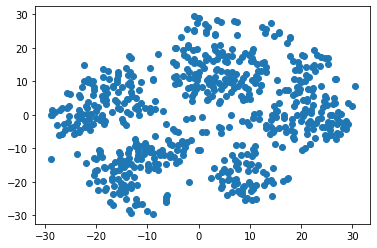

In [25]:
# Visualize the clusters
plt.scatter(X['x'], X['y'])
plt.show()

In [26]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

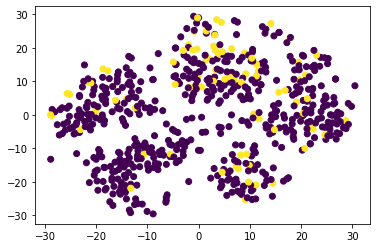

In [27]:
# Visualize the clusters with color
plt.scatter(X['x'], X['y'], c=labels)
plt.show()

Sample Analysis

After performing dimensionality reduction with T-SNE, there are five clusters that can be identified.

## K-means

In [17]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    

In [18]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

In [19]:
df_elbow.head(10)

,k,inertia
0,1,268876.312500
1,2,132651.625000
2,3,83652.476562
3,4,56610.445312
4,5,40561.195312
5,6,33859.617188
6,7,29555.443359
7,8,26394.837891
8,9,23471.417969
9,10,20810.414062


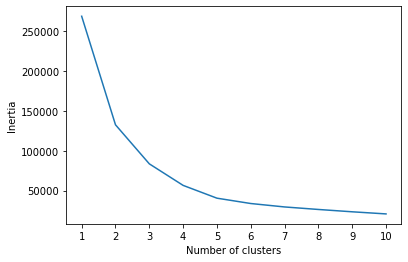

In [20]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [61]:
def get_clusters(k, tsne_features):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=42)

    # Train the model
    model.fit(tsne_features)

    # Predict clusters
    predictions = model.predict(tsne_features)

    # Create return DataFrame with predicted clusters
    tsne_features["class"] = model.labels_

    return tsne_features

In [62]:
clusters = get_clusters(5, df_pca)
clusters

,componant 1,componant 2,componant 3,componant 4,componant 5,componant 6,componant 7,componant 8,componant 9,componant 10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,4
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,4
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,0
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,0
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,4


In [63]:
def show_clusters(df_pca):
    plt.scatter(df_pca['componant 1'], df_pca['componant 2'], c=df_pca['class'])
    plt.xlabel('componant 1')
    plt.ylabel('componant 2')
    plt.show()

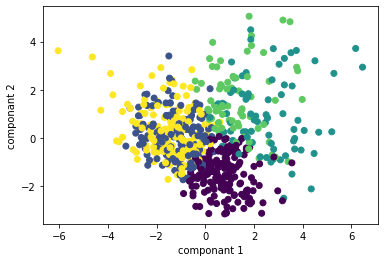

In [64]:
show_clusters(clusters)

## Recommendation
The lowest elbow of the plot occurs at k = 5, indicating that the best number of clusters for the given data is 5. Therefore, it is recommended that the patients be grouped into five clusters. 